## Liberary

In [325]:
from k_means_constrained import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
from itertools import permutations

## Auxiliary functons

In [326]:
def create_delivery(x,y,n, seed_value = None):
    if seed_value != None:
        random.seed(seed_value)

    x_range = [x[0], y[0]]
    y_range = [x[1], y[1]]
    loc = []

    for _ in range(n):
        x_loc = random.uniform(x_range[0], x_range[1])
        y_loc = random.uniform(y_range[0], y_range[1])
        loc.append(tuple([x_loc, y_loc]))

    return loc

In [327]:
def check_location(delivery_loc, border):
    euc_pts = []
    man_pts = []

    for loc in delivery_loc:
        if loc[0] <= border[0][0]:
            euc_pts.append(loc)
        else:
            man_pts.append(loc)

    return euc_pts, man_pts

Visualization

In [328]:
def initial_plot(delivery_loc, border):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    # plot the border
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("Delivery Locations")
    plt.show()

In [361]:
def clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(manhattan_centroids[:,0], manhattan_centroids[:,1], marker='^', c="black")
    plt.scatter(euclidean_centroids[:,0], euclidean_centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("Delivery Locations")
    plt.show()

In [330]:
def tsp_path_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, path_show = False):
    for i in manhattan_clusters:
        points = np.array(manhattan_clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    for j in euclidean_clusters:
        points = np.array(euclidean_clusters[j])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    
    if path_show:
        for i in range(len(euclidean_clusters)):
            path = euclidean_clusters[i]
        
            for j in range(len(path)-1):
                plt.plot((path[j][0],path[j+1][0]),(path[j][1],path[j+1][1]))

        for i in range(len(manhattan_clusters)):
            path = manhattan_clusters[i]
        
            for j in range(len(path)-1):
                plt.plot((path[j][0],path[j][0]),(path[j][1],path[j+1][1]))
                plt.plot((path[j][0],path[j+1][0]),(path[j+1][1],path[j+1][1]))
    
    plt.scatter(manhattan_centroids[:,0], manhattan_centroids[:,1], marker='^', c="black")
    plt.scatter(euclidean_centroids[:,0], euclidean_centroids[:,1], marker='^', c="black")
    plt.plot((border[0][0],border[1][0]), (border[0][1],border[1][1]), c="black")
    plt.title("After Calculating shortest path")
    # plt.show()

In [331]:
def dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, dp, path_show = False):
    tsp_path_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, path_show=path_show)
    plt.scatter(dp[0], dp[1],marker='X',c="red",s=200)

kMeans

In [332]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [333]:
# from k_means_constrained import KMeansConstrained
# import k_means_constrained

# def KMeans_Euclidian(delivery_loc, n, k):
#     n_cluster = n//k if n%k == 0 else n//k + 1

#     model = k_means_constrained.KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
#     model.fit_predict(np.array(delivery_loc))

#     labels = model.labels_
#     clusters = {label:[] for label in range(n_cluster)}

#     for i in range(len(delivery_loc)):
#         clusters[labels[i]].append(delivery_loc[i])

#     return model.cluster_centers_, clusters

TSP

In [334]:
def calculate_manhattan_distance(point1, point2):
    return (abs(point1[0]-point2[0]) + abs(point1[1]-point2[1]))

In [335]:
def calculate_euclidean_distance(pt1, pt2):
    pt1 = np.array(pt1)
    pt2 = np.array(pt2)
    return np.sqrt(np.sum((pt2 - pt1)**2))

In [336]:
def calculate_path_distance(path, manhattan = False):
    distance = 0
    if not manhattan:
        for i in range(len(path)-1):
            distance += np.sqrt((path[i+1][0]-path[i][0])**2 + (path[i+1][1] - path[i][1])**2)
    else:
        for i in range(len(path)-1):
            distance += abs(path[i+1][0]-path[i][0]) + abs(path[i+1][1] - path[i][1])

    return distance

In [337]:
def tsp_euc(points):
    all_path = permutations(points)
    possible_path = []
    distance_list = []

    for path in all_path:
        path = list(path)
        distance = calculate_path_distance(path, manhattan = False)

        possible_path.append(path)
        distance_list.append(distance)

    idx = np.argmin(distance_list)
    result_path = possible_path[idx]

    return result_path

In [338]:
def tsp_man(points):
    all_path = permutations(points)
    possible_path = []
    distance_list = []

    for path in all_path:
        path = list(path)
        distance = calculate_path_distance(path, manhattan = True)

        possible_path.append(path)
        distance_list.append(distance)

    idx = np.argmin(distance_list)
    result_path = possible_path[idx]

    return result_path

In [339]:
def shortest_path_euc(cluster, dp):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].insert(0,dp)
        path[i].append(dp)
        
        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(points)-1):
            # sum += calculate_euclidean_distance(points[j], points[j+1])
            sum += calculate_path_distance([points[j], points[j+1]], manhattan=False)
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx], cost[idx]

In [340]:
def shortest_path_man(cluster, dp, inter_point = None):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].insert(0,dp)
        if inter_point != None:
            cur = path[i]
            path[i].insert(1,[inter_point, cur[1][1]])
            path[i].append([inter_point, cur[-1][1]])
        path[i].append(dp)
        
        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(points)-1):
            # sum += calculate_manhattan_distance(points[j], points[j+1])
            sum += calculate_path_distance([points[j], points[j+1]], manhattan=True)
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx], cost[idx]

CP creation

In [341]:
def create_euc_dp(border, centroid):
    x = [i if i<border[0][0] else border[0][0] for i,j in centroid]
    y = [j for i,j in centroid]

    return [np.mean(x), np.mean(y)]

## Main

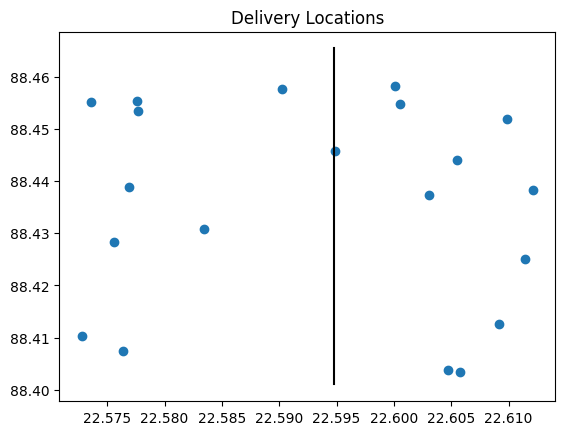

In [342]:
#no of delivery locations and drone capacity
n = 20
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
border = [[22.5948, 88.4010],[22.5948, 88.4654]]
delivery_loc = create_delivery(x, y, n)

# Visualize the data
initial_plot(delivery_loc,border)

In [343]:
# separating euclidean and manhattan points
euclidean_points, manhattan_points = check_location(delivery_loc, border)

print(len(euclidean_points), len(manhattan_points))

9 11


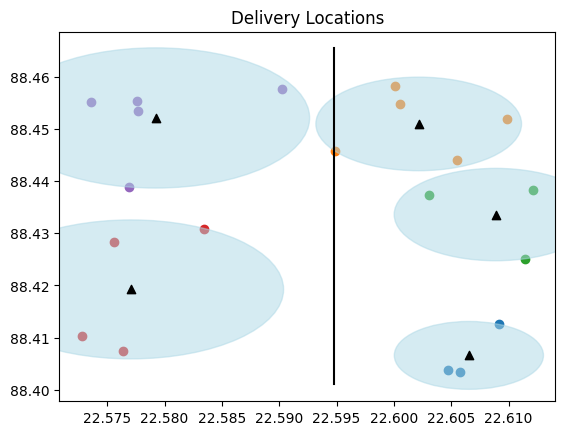

In [362]:
# Cluster the data and get the labels and centroids
manhattan_centroids, manhattan_clusters = KMeans(manhattan_points, len(manhattan_points), k)
euclidean_centroids, euclidean_clusters = KMeans(euclidean_points, len(euclidean_points), k)

# Visualize the data
clusters_plot(manhattan_clusters, euclidean_clusters, manhattan_centroids, euclidean_centroids, border)

In [345]:
# apply tsp in each of the clusters
for cls_no, cluster in euclidean_clusters.items():
    euclidean_clusters[cls_no] = tsp_euc(cluster)

for cls_no, cluster in manhattan_clusters.items():
    manhattan_clusters[cls_no] = tsp_man(cluster)

<font color="orange">Euclidean side dp</font>

[22.588136068938734, 88.43334617525525]


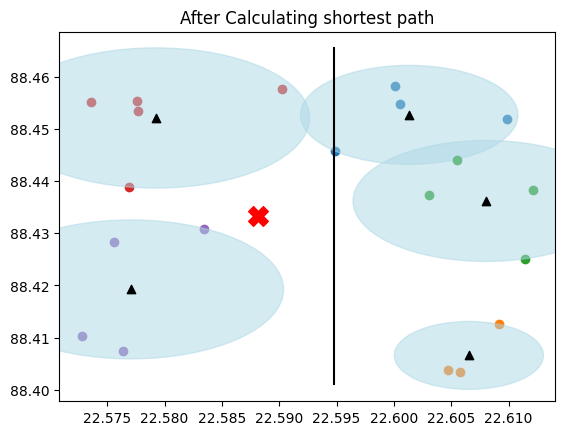

In [346]:
DP_2 = create_euc_dp(border,euclidean_centroids.tolist() + manhattan_centroids.tolist())

print(DP_2)
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_2)

In [347]:
modified_euc_cluster = dict()
modified_man_cluster = dict()
total_distance_2 = 0

for i in euclidean_clusters:
    modified_euc_cluster[i], distance = shortest_path_euc(euclidean_clusters[i].copy(), DP_2)
    total_distance_2 += distance

for i in manhattan_clusters:
    modified_man_cluster[i], distance = shortest_path_man(manhattan_clusters[i].copy(), DP_2, inter_point = border[0][0])
    total_distance_2 += distance

print("Total distance in centroid approach :",total_distance_2)

Total distance in centroid approach : 0.4187046496852467


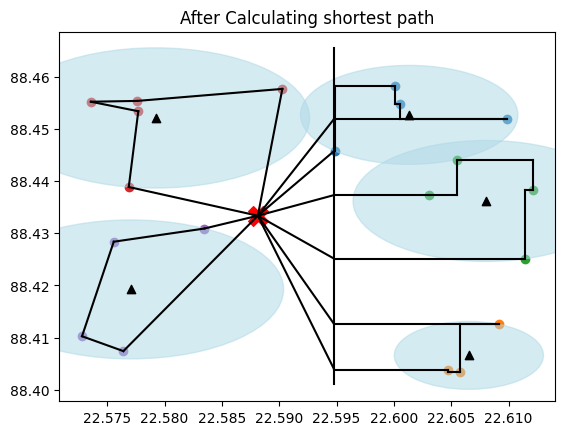

In [348]:
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_2)

for cls_id, path in modified_euc_cluster.items():
    for i in range(len(path)-1):
        plt.plot([path[i][0],path[i+1][0]],[path[i][1],path[i+1][1]], c="black")

for i in modified_man_cluster:
    pts = np.array(modified_man_cluster[i])

    for j in range(1,len(pts)-2):
        pt_1 = pts[j]
        pt_2 = pts[j+1]

        # x axis
        f_pt = np.array([pt_1[0], pt_1[0]])
        s_pt = np.array([pt_1[1], pt_2[1]])

        # y axis
        t_pt = np.array([pt_1[0], pt_2[0]])
        l_pt = np.array([pt_2[1], pt_2[1]])

        plt.plot(f_pt, s_pt, c="black")
        plt.plot(t_pt, l_pt, c="black")

    plt.plot((pts[0][0],pts[1][0]),(pts[0][1],pts[1][1]), c="black")
    plt.plot((pts[-2][0],pts[-1][0]),(pts[-2][1],pts[-1][1]), c="black")

In [349]:
print("distance in DP 1 :",total_distance_2)

distance in DP 1 : 0.4187046496852467


<font color="orange">Manhattan side dp</font>

In [350]:
def calculate_border_point(euclidean_clusters, manhattan_clusters, border):
    possible_positions = np.linspace(border[0][1], border[1][1], num=100)

    min_distance = float('inf')
    border_y = None
    
    for i in possible_positions:
        border_point = [border[0][0], i]
        total_distance = 0

        for cls_id, clust in euclidean_clusters.items():
            path = clust.copy()
            path.append(border_point)
            path.insert(0, border_point)

            total_distance += calculate_path_distance(path, manhattan=False)

        for cls_id, clust in manhattan_clusters.items():
            path = clust.copy()
            path.append(border_point)
            path.insert(0, border_point)

            total_distance += calculate_path_distance(path, manhattan=True)

        if total_distance<min_distance:
            min_distance = total_distance
            border_y = i

    return border_y

In [351]:
def calculate_euclidean_x(manhattan_clusters, manhattan_centroids, euclidean_clusters=None, euclidean_centroids = None,border = None, method='entry_exit'):
    if method == 'entry_exit':
        x = []

        for cls_id, cluster in manhattan_clusters.items():
            x.append(cluster[0][0])
            x.append(cluster[-1][0])

        if euclidean_clusters != None and border != None:
            for cls_id, cluster in manhattan_clusters.items():
                x.append(border[0][0])
                x.append(border[0][0])
    else:
        x = [i for i,j in manhattan_centroids]

        if euclidean_clusters != None and border != None:
            for center in euclidean_centroids:
                x.append(border[0][0])

    return np.median(x)

In [352]:
y_axis = calculate_border_point(euclidean_clusters, manhattan_clusters, border)
x_axis_2 = calculate_euclidean_x(manhattan_clusters, manhattan_centroids, euclidean_clusters = euclidean_clusters, euclidean_centroids=euclidean_centroids,border=border, method='centroid')

print(x_axis_2, y_axis)

22.601333728034753 88.43482626262626


In [353]:
DP_Man_2 = [x_axis_2, y_axis]

test 2

In [354]:
total_distance_5 = 0

euclidean_cluster_distance = 0
for cls_id, path in euclidean_clusters.items():
    temp_path = path.copy()
    temp_path.append([border[0][0], y_axis])
    temp_path.insert(0, [border[0][0], y_axis])

    euclidean_cluster_distance += calculate_path_distance(temp_path, manhattan = False)

dp_to_border_distance = 0
for cls_id, path in manhattan_clusters.items():
    temp_path = []
    temp_path.append(DP_Man_2)
    temp_path.append([border[0][0], y_axis])
    dp_to_border_distance += calculate_path_distance(temp_path, manhattan = True)

manhattan_cluster_distance = 0
for cls_id, path in manhattan_clusters.items():
    temp_path = path.copy()
    temp_path.append(DP_Man_2)
    temp_path.insert(0, DP_Man_2)

    manhattan_cluster_distance += calculate_path_distance(temp_path, manhattan = True)

total_distance_5 = euclidean_cluster_distance + dp_to_border_distance + manhattan_cluster_distance

print("Total distance in centroid approach :",total_distance_5)

Total distance in centroid approach : 0.39492526899934133


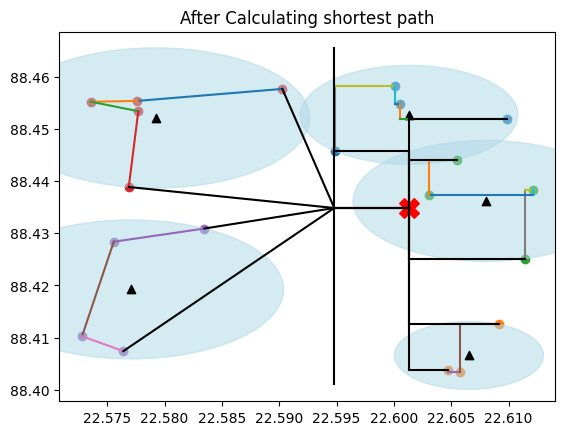

In [355]:
dp_plot(euclidean_clusters, manhattan_clusters, euclidean_centroids, manhattan_centroids, border, DP_Man_2, path_show=True)

for cls_id, path in euclidean_clusters.items():
    plt.plot(([border[0][0],path[0][0]]),([DP_Man_2[1],path[0][1]]),c="black")
    plt.plot(([border[0][0],path[-1][0]]),([DP_Man_2[1],path[-1][1]]), c="black")

for cls_id, path in manhattan_clusters.items():
    plt.plot([DP_Man_2[0], border[0][0]],[DP_Man_2[1], DP_Man_2[1]],c="black")

for cls_id, path in manhattan_clusters.items():
    plt.plot(([DP_Man_2[0],DP_Man_2[0]]),([DP_Man_2[1],path[0][1]]),c="black")
    plt.plot(([DP_Man_2[0],path[0][0]]),([path[0][1],path[0][1]]),c="black")

    plt.plot(([DP_Man_2[0],DP_Man_2[0]]),([DP_Man_2[1],path[-1][1]]), c="black")
    plt.plot(([DP_Man_2[0],path[-1][0]]),([path[-1][1],path[-1][1]]), c="black")

In [356]:
print("Total distance in DP 2 :",total_distance_5)

Total distance in DP 2 : 0.39492526899934133


## Comparison

In [357]:
print("Total distance in DP 1 :",total_distance_2)
print("Total distance in DP 2 :",total_distance_5)

Total distance in DP 1 : 0.4187046496852467
Total distance in DP 2 : 0.39492526899934133


In [358]:
final_distance = min(total_distance_2, total_distance_5)
print("Final distance :", final_distance)

Final distance : 0.39492526899934133


In [359]:
df = pd.read_csv('./Multi_Capacity_performance.csv')

new_row = {
    'total_delivery':n,
    'drone_capacity':k,
    'euclidean_points':len(euclidean_points),
    'manhattan_points':len(manhattan_points),
    'distance':final_distance
}

df.loc[len(df)] = new_row

df.tail()

,total_delivery,drone_capacity,euclidean_points,manhattan_points,distance
65,25,4,25,0,0.395916
66,20,4,20,0,0.327970
67,20,4,0,20,0.399432
68,20,4,0,20,0.399432
69,20,5,9,11,0.394925


In [360]:
# try:
#     df.to_csv('./Multi_Capacity_performance.csv', index=False)
# except:
#     print("Unknown error occurs")